<h2>Exercise on the Deutsch-Josza algorithm.</h2>

<h5> Documentation:

Implementation of Deutsch-Josza algorithm:<br>
https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/deutsch-jozsa.ipynb

Documentation for Statevector class:<br>
https://docs.quantum.ibm.com/api/qiskit/0.24/qiskit.quantum_info.Statevector#qiskit.quantum_info.Statevector.add

Documentation on Operators:<br>
https://docs.quantum.ibm.com/build/operators-overview
</h5>

In [84]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.circuit import Gate
from qiskit.quantum_info.operators import Operator

<h4>Producing the Oracle gate $U_f$ corresponding to $n$-bit boolean function </h4>
<big>The oracle is the return of $qf(flag,n)$:
$flag$ is either 'b' for balanced or 'c' for constant, and $n$ is the number of bits. <br>  
The balanced function is constructed from
$f((x_1,x_2,\cdots,x_n)) = r(x_1)\oplus r(x_2) \oplus \cdots \oplus r(x_n)\,,$
where $r(x_i)$ is $x_i$ or $\overline{x_i}$ at random.
</big>

In [16]:
# The quantum function acting on n-bits
# --------------------------------------
def qf(flag, n):
    qc = QuantumCircuit(n+1)
    if flag == 'b':
        r = np.random.randint(2**n)       # random integer from 0 to 2^n-1
        rstr = format(r, '0'+str(n)+'b')  # format r as n-bits
        for b in range(len(rstr)): 
            if rstr[b] == '1': qc.x(b)  # add the random X gates in the input n-qubits register
        # qc.barrier(range(n))
        for qb in range(n): qc.cx(qb,n) # control of the result qubit by the input n-qubits  
        # qc.barrier(range(n))
        for b in range(len(rstr)): 
            if rstr[b] == '1': qc.x(b)  # undo the random X gates in the input n-qubits register

    if flag == 'c':
        r = np.random.randint(2)
        if r == 1: qc.x(n)
        
    qf_gate = qc.to_gate()
    qf_gate.name = 'Uf'
    return qf_gate

<h4>The function implementing the Deutsch-Josza algorithm </h4>
<big>The function has an input the oracle $U_f$, and returns the Deutsch-Josza algorithm circuit </big>

In [69]:
# The Deutsch-Josza algorithm
# ----------------------------

def dj_algo(qf):
    n = qf.num_qubits
    qc = QuantumCircuit(n,n-1)
    init = Statevector.from_int(2**(n-1),2**n)
    qc.initialize(init)
    qc.h(range(n))
    qc.append(qf,range(n))
    qc.h(range(n-1))
    qc.measure(range(n-1),range(n-1))
    return qc

<h4>Application of the Deutsch-Josza algorithm with a constant function on $5$ bits</h4>

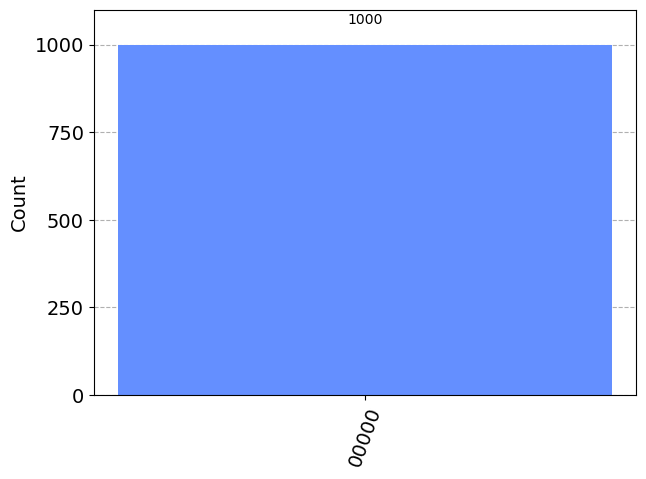

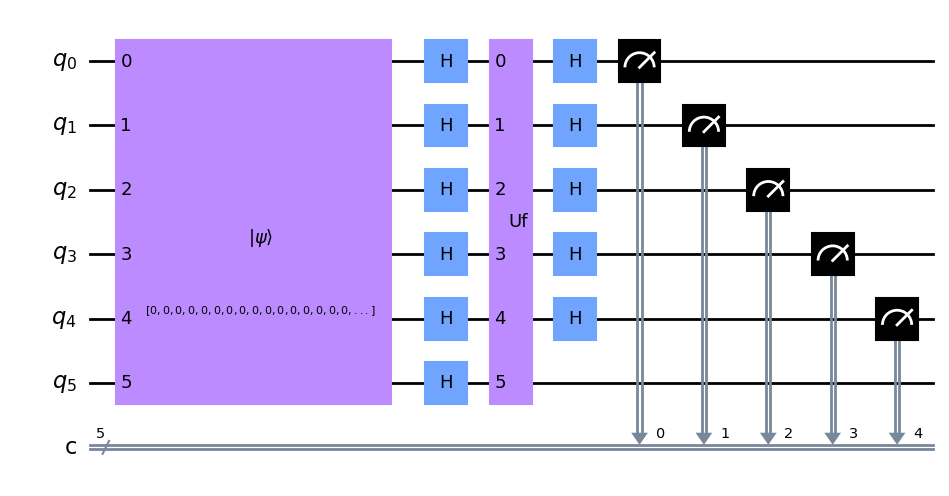

In [78]:
Uf = qf('c',5)
qc = dj_algo(Uf)

sim = Aer.get_backend('aer_simulator')
shots = 1000
counts = execute(qc, sim, shots=shots).result().get_counts()

display(plot_histogram(counts))
qc.draw(output='mpl')

<h4>Application of the Deutsch-Josza algorithm with a balanced function on $5$ bits</h4>
<big>Note: For balanced functions of the form $f((x_1,\cdots,x_n)) = r(x_1)\oplus\cdots\oplus r(x_n)$, the probability of $|11\cdots 1\rangle$ is $1$.</big>

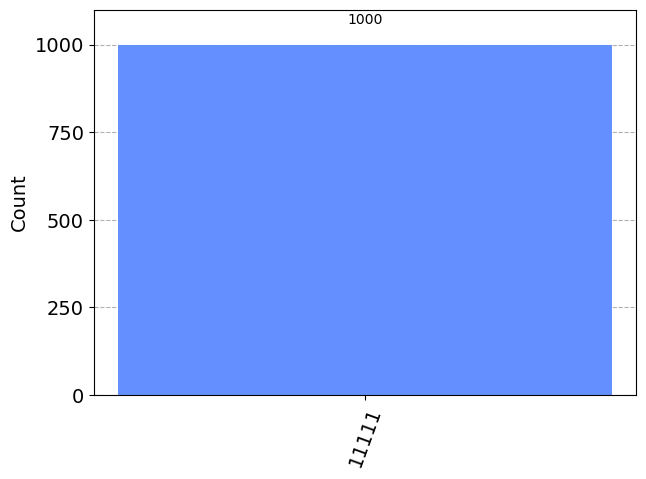

In [76]:
Uf = qf('b',5)
qc = dj_algo(Uf)

sim = Aer.get_backend('aer_simulator')
shots = 1000
counts = execute(qc, sim, shots=shots).result().get_counts()
display(plot_histogram(counts))

<h4>Application of the Deutsch-Josza algorithm with a balanced function on $2$ bits, defined by: 
\begin{align}& f((x1,x2)) = {x_1}\,, \\ &(00)\mapsto (01), (10) \mapsto (11)\,.\end{align}
The $U_f$ is given by the quantum gate of the unitary operator:<br>
$$000 \rightarrow 000$$
$$001 \rightarrow 001$$
$$010 \rightarrow 110$$
$$011 \rightarrow 111$$
$$100 \rightarrow 100$$
$$101 \rightarrow 101$$
$$110 \rightarrow 010$$
$$111 \rightarrow 011$$
Note: for this function, the probability of $(10)$ is $1$.

In [86]:
# Operator for Uf with the balanced function on 2-bits given by
#                 f(00) = f(01) = 0
#                 f(10) = f(11) = 1

op = Operator([ [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0] ])

array_to_latex(op)

<IPython.core.display.Latex object>

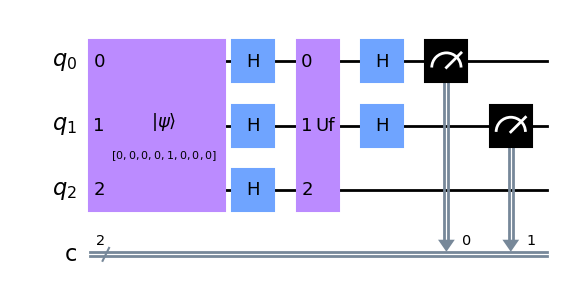

In [71]:
nqb = len(op.input_dims())  # number of qubits
qc = QuantumCircuit(nqb)    
qc.append(op,range(nqb))
Uf= qc.to_gate()   # convert the quantum circuit into a gate
Uf.name = 'Uf'

qc = dj_algo(Uf)   # the Deutsch-Josza algorithm is called with the function gate
qc.draw(output='mpl')

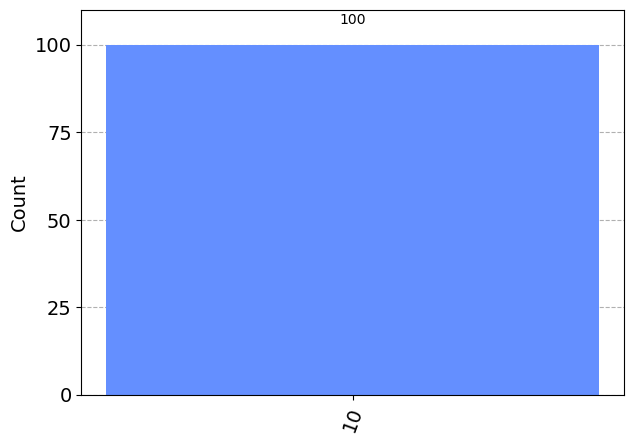

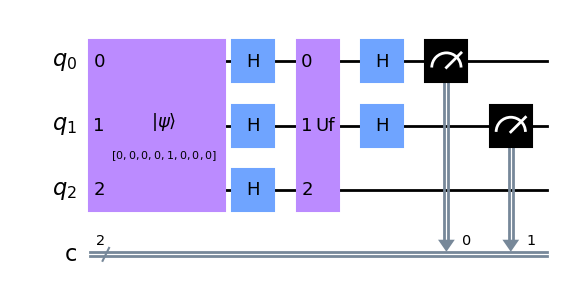

In [72]:
sim = Aer.get_backend('aer_simulator')
shots = 100
counts = execute(qc, sim, shots=shots).result().get_counts()
display(plot_histogram(counts))
qc.draw(output='mpl')